In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from datetime import datetime
# matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import gc
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, output_notebook, show

In [2]:
# 주피터 목차 생성
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

In [3]:
# pip install pyarrow

In [4]:
# pip install fastparquet

In [5]:
data_dir_ = 'C:/Users/guswp/Desktop/project/data/'

In [6]:
# def csv_to_parquet(csv_path, save_name):
#     df = pd.read_csv(data_dir_ + csv_path)
#     df.to_parquet(data_dir_ + f'{save_name}.parquet')
#     del df
#     gc.collect()
#     print(save_name, 'Done.')

In [7]:
# csv_to_parquet('train.csv', 'train')
# csv_to_parquet('test.csv', 'test')

In [8]:
train = pd.read_parquet(data_dir_ + 'train.parquet')
test = pd.read_parquet(data_dir_ + 'test.parquet')

In [9]:
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']

In [10]:
train.drop(['road_in_use'],axis=1,inplace=True)
test.drop(['road_in_use'],axis=1,inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [12]:
pd.set_option('display.max_columns', None)
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [13]:
da_info = pd.read_csv(data_dir_+'data_info.csv')

In [14]:
da_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [15]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


# 함수

In [16]:
def boxplot(feature):
    plt.figure(figsize=(8,12))
    sns.boxplot(x=train[feature].to_numpy(),y=train['target'].to_numpy())
    plt.grid()
    plt.show()

In [17]:
def barplot(feature,estimators = np.mean):
    plt.figure(figsize=(8,12))
    sns.barplot(x=train[feature].to_numpy(),y=train['target'].to_numpy(),estimator=estimators)
    plt.grid()
    plt.show()

# EDA

## base_date (날짜)

In [18]:
train['base_date'] = pd.to_datetime(train['base_date'],format='%Y%m%d')
test['base_date'] = pd.to_datetime(test['base_date'],format='%Y%m%d')

In [19]:
train['base_date'][0].year

2022

In [20]:
train_date_list = set((train['base_date'].apply(lambda x: str(x.year) +'-'+ str(x.month))).to_list())

In [21]:
print('학습데이터 날짜 년/월: ',*sorted(list(train_date_list)))

학습데이터 날짜 년/월:  2021-10 2021-11 2021-12 2021-9 2022-1 2022-2 2022-3 2022-5 2022-6 2022-7


In [22]:
test_date_list = set((test['base_date'].apply(lambda x: str(x.year) +'-'+ str(x.month))).to_list())

In [23]:
print('검증데이터 날짜 년/월: ',*sorted(list(test_date_list)))

검증데이터 날짜 년/월:  2022-8


In [24]:
train['month'] = train['base_date'].dt.month

In [25]:
test['month'] = test['base_date'].dt.month

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


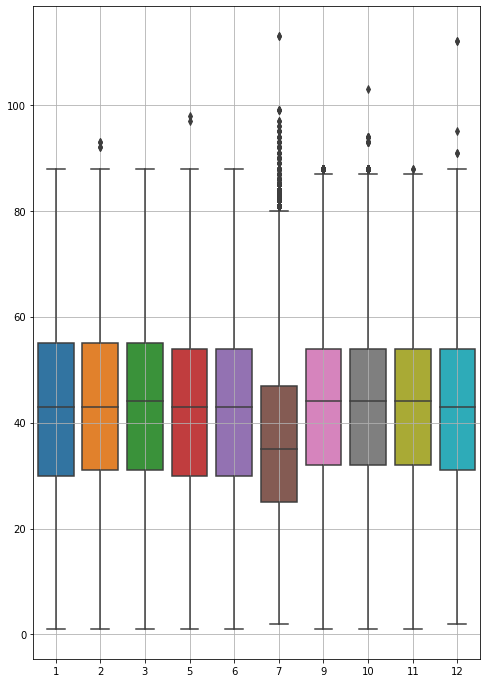

In [26]:
boxplot('month')

- 7월에 크게 평균속도가 떨어짐
- 예측 대상은 2022년 8월인데, 어떻게 활용할지...
- 7월만 활용하자니 데이터가 너무 많이 버려짐
- 날짜 데이터는 날씨(강수량, 기온등...)연결만 하고 제거하자

## day_of_week (요일)

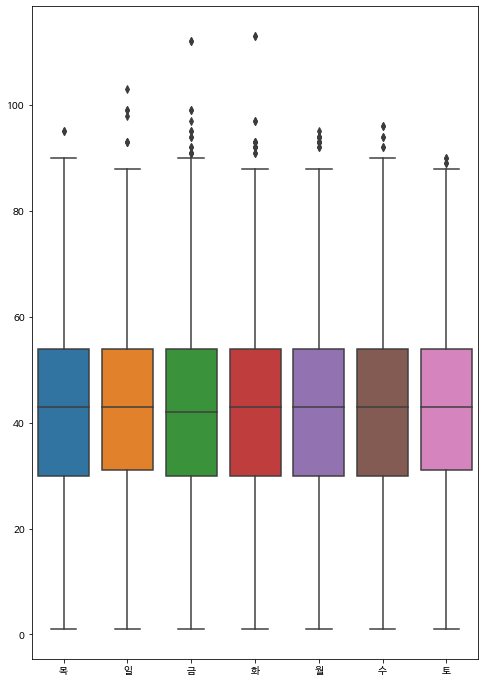

In [ ]:
boxplot('day_of_week')

In [ ]:
train[['day_of_week','target']].groupby('day_of_week').mean()

,target
day_of_week,
금,42.450328
목,42.768345
수,42.770372
월,42.761365
일,43.179300
토,42.894117
화,42.699198


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '평균 속도 분포')

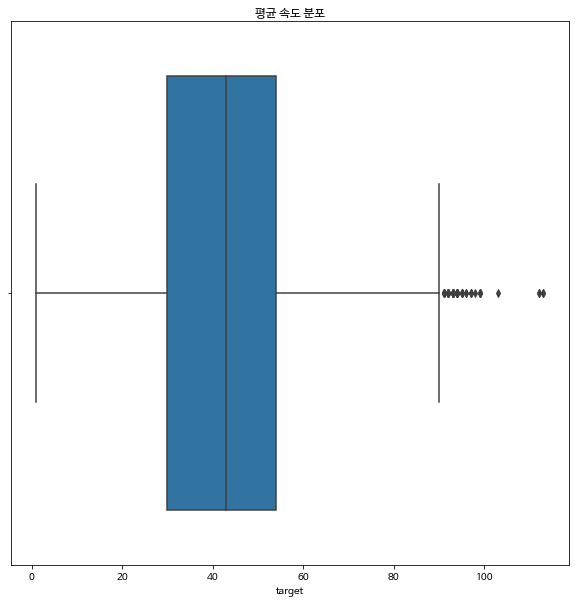

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(train['target'])
plt.title('평균 속도 분포')

- 요일자체는 평균 속도에 큰 영향을 주진 않는 것으로 보임
- 하지만, 전혀 영향이 없진 않을 듯
- 특정 요일에는 A시간대, 다른 요일에는 B시간대에 영향이 있지않을까...?

In [ ]:
# from bokeh.plotting import figure
# from bokeh.io import show, output_notebook
# import numpy as np

# p = figure(plot_width = 400,plot_height=300,
#           title= ' ' ,
#           x_axis_label = ' ', y_axis_label = ' ')
# p.vbar(train['day_of_week'].to_numpy(),
#        width = 1,
#        bottom= 0,
#        top = train['target'].to_numpy(),
#        color = 'blue')

# output_notebook()
# show(p)

## base_hour (시간대)

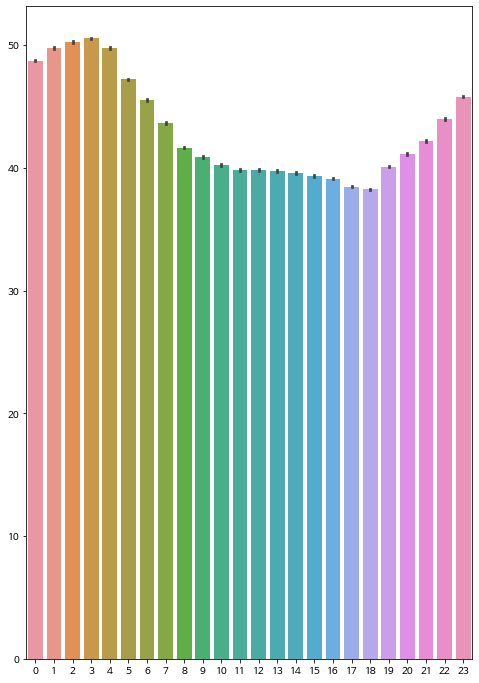

In [ ]:
barplot('base_hour')

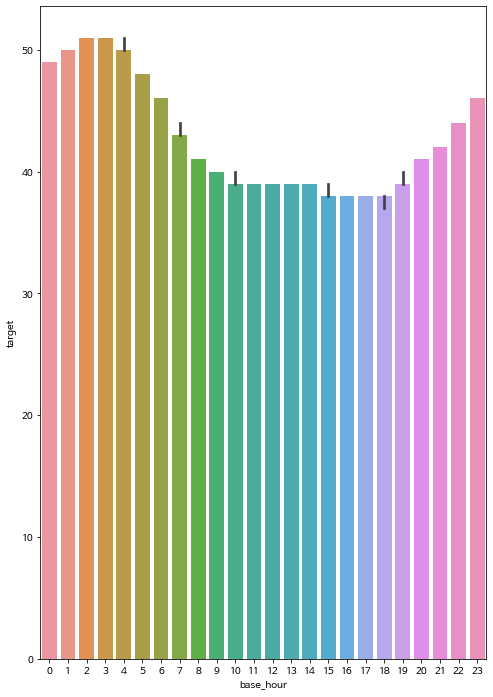

In [ ]:
barplot('base_hour',np.median)

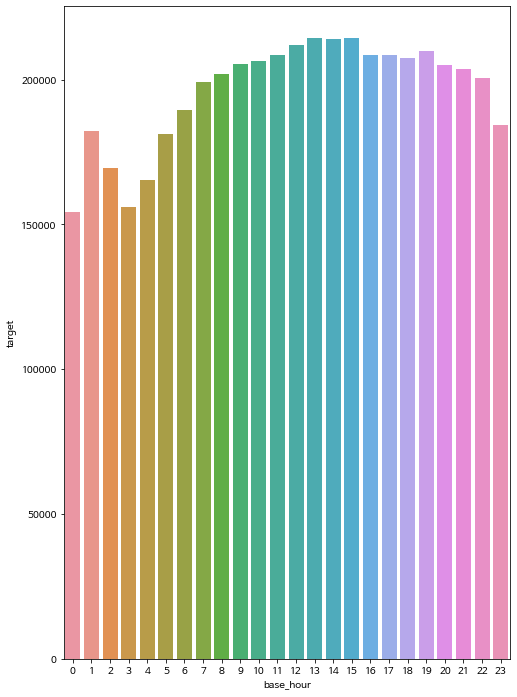

In [ ]:
barplot('base_hour',len)

C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3

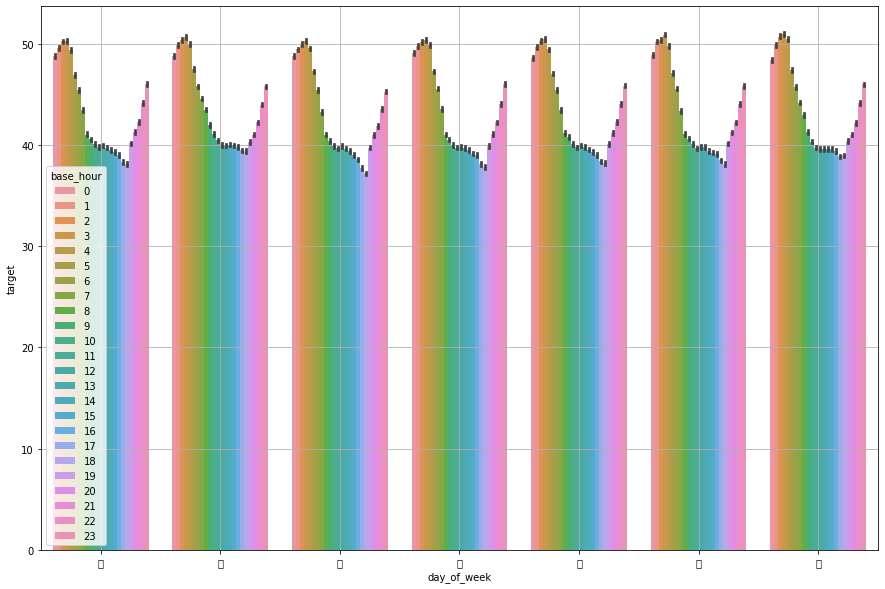

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x='day_of_week',y='target',data = train, hue='base_hour')
plt.grid()
plt.show()

- 8 ~ 16를 활동시간이라고 봤을 때, 토일은 차량 속도가 비슷하지만 평일은 퇴근시간에 확 떨어지고 그 중에 금요일에는 떨어지는 폭이 더 큼
- 새벽 기준으로 주말에는 속도가 빠르지만 평일은 비교적 느림
---
-----> 평일 주말이나 월화수목, 금, 주말로 구분하는 변수 생성해도 될 듯



## lane_count (차로수)

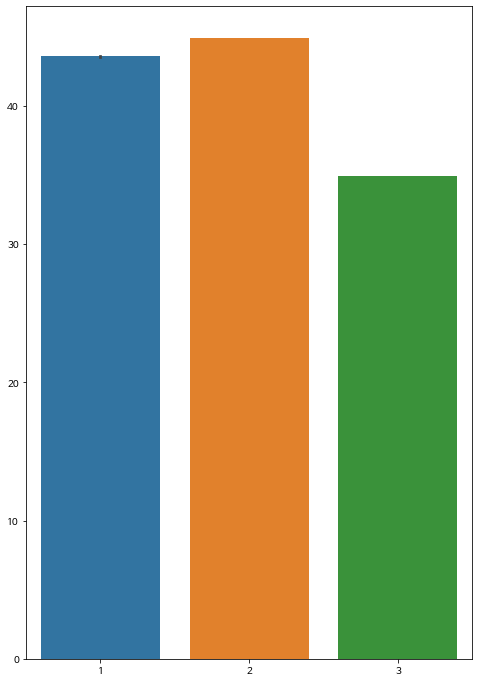

In [ ]:
barplot('lane_count')

- 차로수가 클수록 고속도로에 가까울테고 그러면 평균속도도 올라가지 않을까 했지만 2 1 3 순으로 차량속도가 빠름..
- 오히려 3차로 쪽으로 차량이 몰려서 평균 속도가 낮게 나오는 듯..

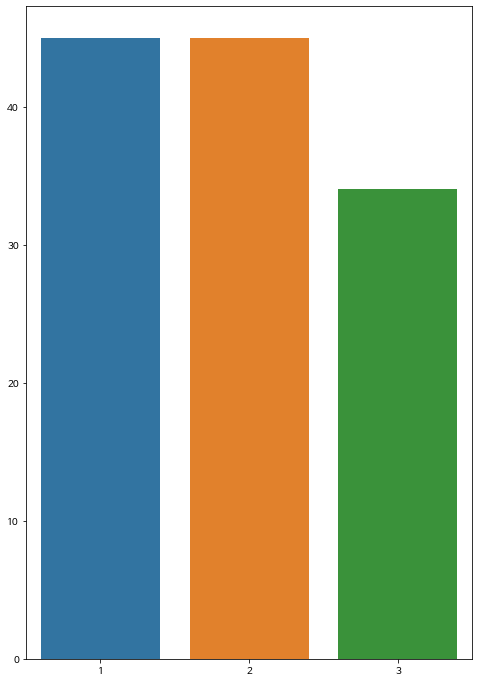

In [ ]:
barplot('lane_count',np.median)

## road_rating (도로등급)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


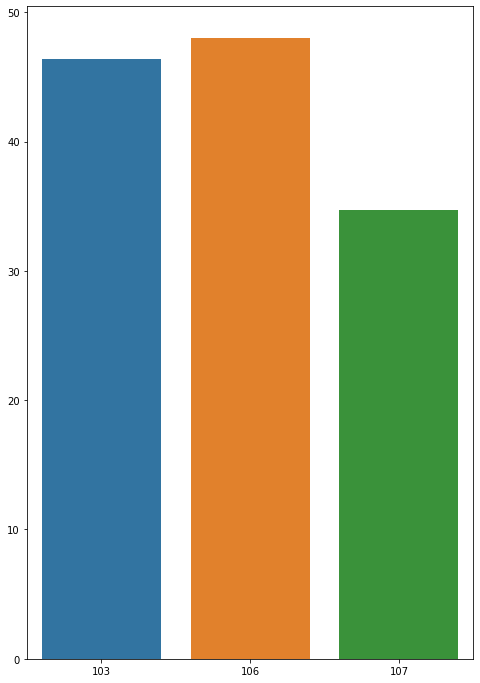

In [18]:
barplot('road_rating')

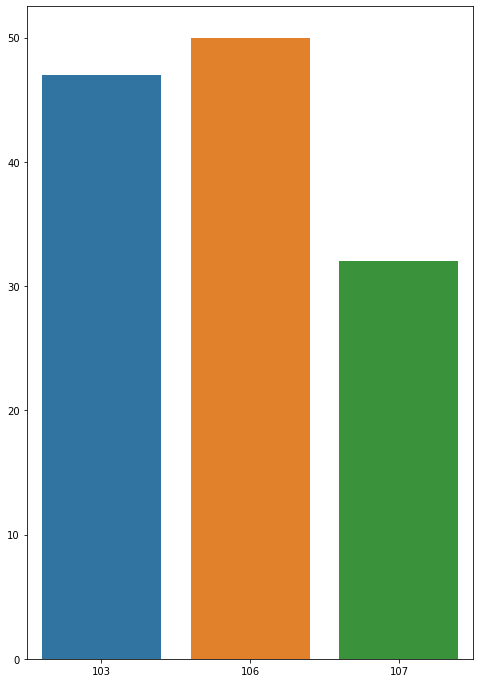

In [21]:
barplot('road_rating',np.median)

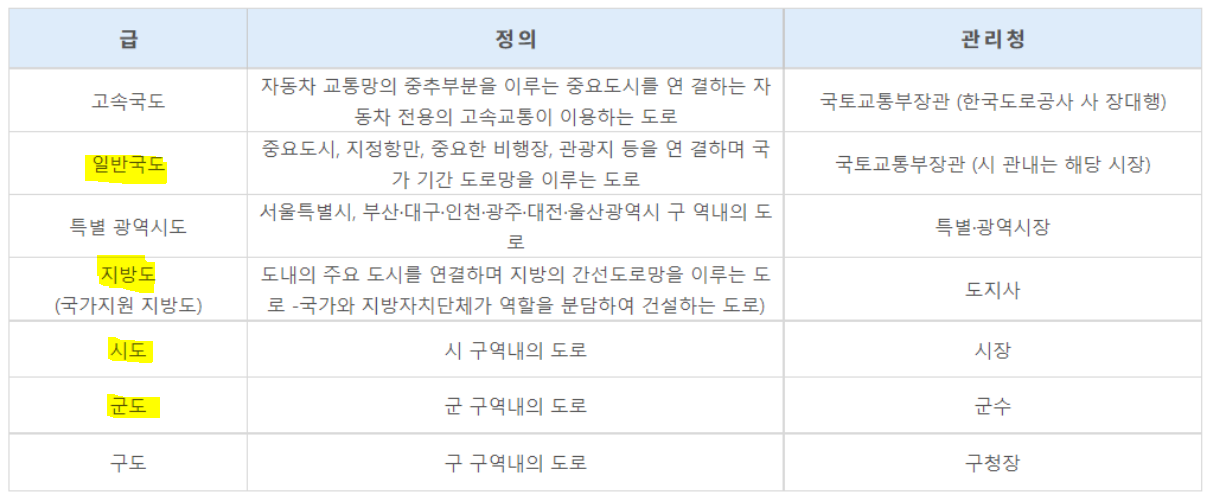

- 103: 일반국도
- 106: 지방도
- 107: 시/군도

In [20]:
train[['road_rating','target']].groupby('road_rating').count()

,target
road_rating,
103,2159511
106,959492
107,1582214


- 확실히 시, 군 내에 존재하는 도로는 교통 속도가 느림
- 일반국도와 지방도의 큰 차이는 안보임 --> 합칠지?그대로?
- 데이터 개수도 각각 많으므로 막대 그래프를 충분히 믿어도 될 듯

## multi_linked (중용구간 여부)

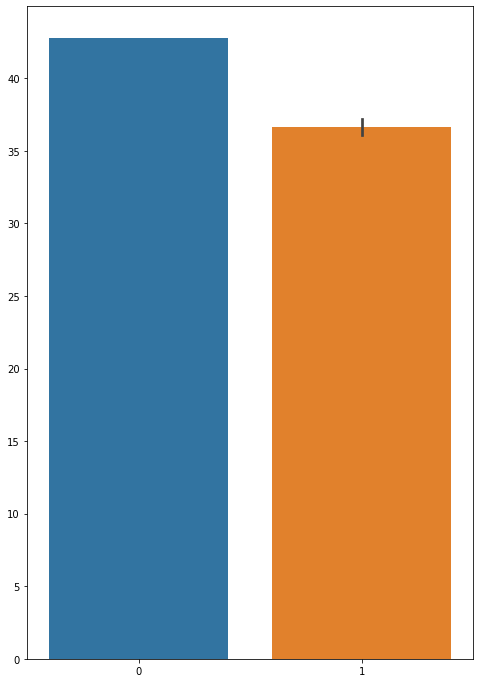

In [19]:
barplot('multi_linked')

In [28]:
print('중용구간인 도로 종류: ',*set(train.loc[train['multi_linked']==1,'road_name'].to_list()))

중용구간인 도로 종류:  남조로


In [32]:
train.loc[(train['road_name'] == '남조로') & (train['multi_linked'] == 1),:]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
2715,TRAIN_0002715,20211212,일,22,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,48.0
2842,TRAIN_0002842,20220323,수,12,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315111,126.714333,없음,의귀교,33.315308,126.714353,없음,17.0
5672,TRAIN_0005672,20211029,금,18,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315111,126.714333,없음,의귀교,33.315308,126.714353,없음,13.0
6065,TRAIN_0006065,20210930,목,14,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315111,126.714333,없음,의귀교,33.315308,126.714353,없음,17.0
7171,TRAIN_0007171,20220211,금,12,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693502,TRAIN_4693502,20220531,화,21,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,59.0
4693857,TRAIN_4693857,20211013,수,17,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,45.0
4694003,TRAIN_4694003,20211227,월,16,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315111,126.714333,없음,의귀교,33.315308,126.714353,없음,43.0
4694142,TRAIN_4694142,20210922,수,6,1,107,남조로,1,0,50.0,0.0,0.0,0.0,3,의귀교,33.315308,126.714353,없음,의귀교,33.315111,126.714333,없음,56.0


- 다른 특성을 못찾은 것일 수도 있지만, mulit_linked 1인 도로는 하나밖에 없을 뿐더러 의미도 없어보임
- 대시보드에 안보이는 데 왜 그런거지?
- 테스트 데이터에는 0밖에 없지만, 모델학습시 0,1을 부여하면 비교해서 더 학습을 잘할지??
- 일단 변수 제거 후보

## connect_code (연결로 코드)

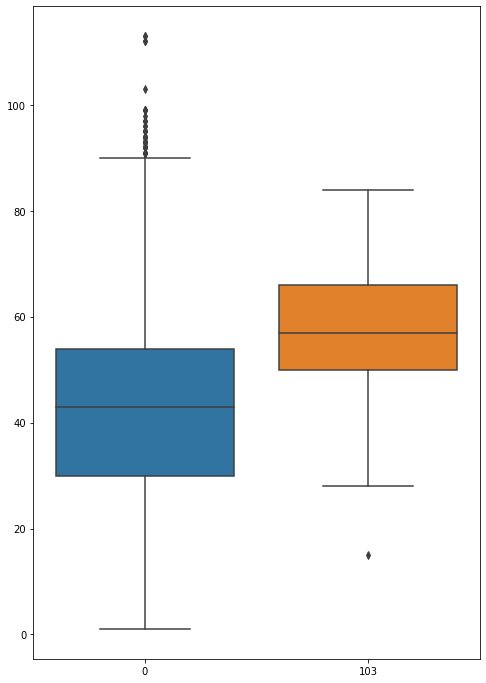

In [33]:
boxplot('connect_code')

In [34]:
train[['connect_code','target']].groupby('connect_code').count()

,target
connect_code,
0,4689075
103,12142


In [35]:
train.loc[train['connect_code']==103,:]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
84,TRAIN_0000084,20220607,화,6,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,74.0
380,TRAIN_0000380,20220205,토,6,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,67.0
961,TRAIN_0000961,20220209,수,13,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,52.0
1107,TRAIN_0001107,20220322,화,9,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,51.0
1182,TRAIN_0001182,20220620,월,19,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699979,TRAIN_4699979,20211204,토,12,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,53.0
4700043,TRAIN_4700043,20220325,금,10,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,54.0
4700232,TRAIN_4700232,20211023,토,7,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,67.0
4700581,TRAIN_4700581,20211011,월,7,2,103,일반국도12호선,0,103,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,양계장,33.475446,126.388193,없음,55.0


- 테스트 데이터에는 0밖에 없지만, 모델학습시 0,1을 부여하면 비교해서 더 학습을 잘할지??
- 일단 변수 제거 후보

## maximum_speed_limit (최고속도제한)

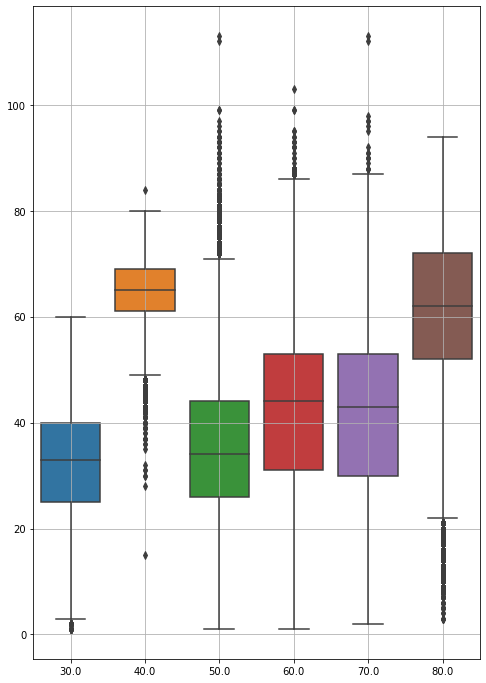

In [41]:
boxplot('maximum_speed_limit')

In [44]:
set(train.loc[train['maximum_speed_limit']==40,'road_name'].to_list())

{'일반국도12호선', '일반국도95호선'}

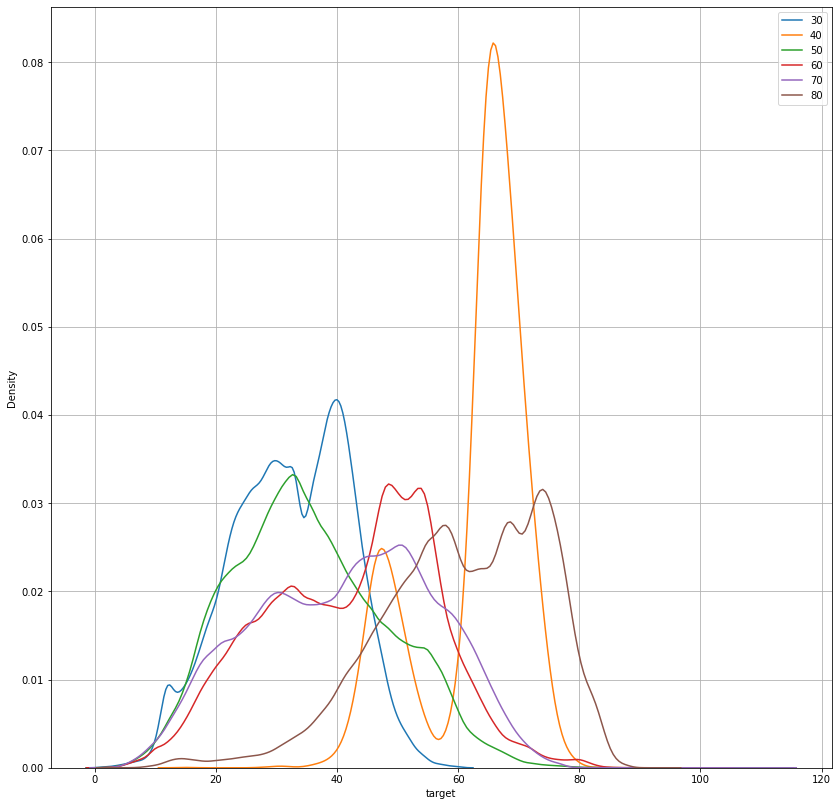

In [46]:
plt.figure(figsize=(14,14))
for i in range(30,90,10):
    sns.kdeplot(train.loc[train['maximum_speed_limit']==i,'target'],label=i)
plt.legend(loc='best')
plt.grid()
plt.show()

- 최고 속도 40제한일 때, 명확히 2그룹으로 나눠지는 걸 볼 수 있음
- '일반국도12호선', '일반국도95호선' 나눠서 분포 그려보자

C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guswp\anaconda3\lib

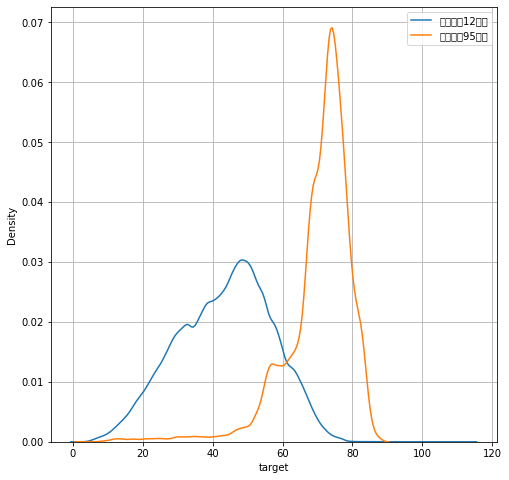

In [48]:
plt.figure(figsize=(8,8))
for i in ['일반국도12호선', '일반국도95호선']:
    sns.kdeplot(train.loc[train['road_name']==i,'target'],label=i)
plt.legend(loc='best')
plt.grid()
plt.show()

- '일반국도12호선', '일반국도95호선' 명확하게 구분되는 것을 확인
- 테스트 데이터에는 제한속도 40인 데이터는 없음
- 도로 구간별로 최고 속도 대비 평균속도 비율이 어떻게 되는지 확인해보자

### 도로 구간별로 **최고 속도**  대비 **평균속도** 비율 분석

In [17]:
train['max_avg_ratio'] = train['target'] / train['maximum_speed_limit']

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


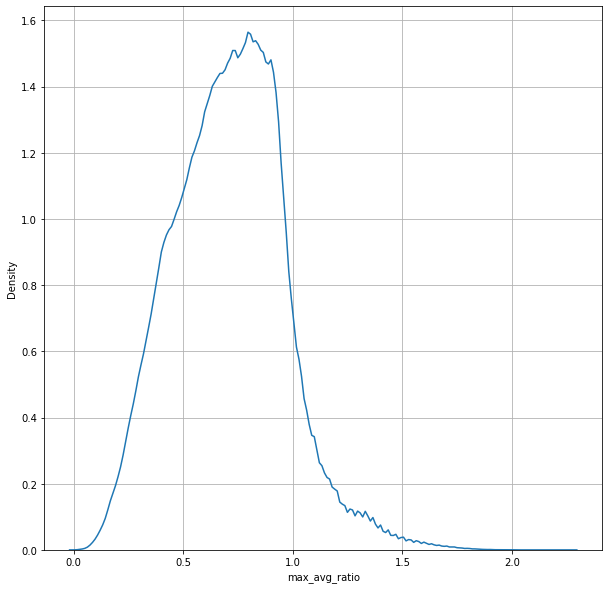

In [17]:
plt.figure(figsize=(10,10))
sns.kdeplot(train['max_avg_ratio'])
plt.grid()
plt.show()

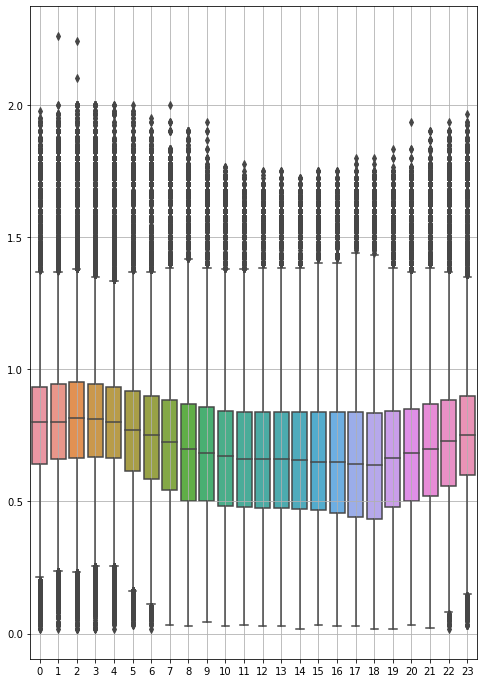

In [19]:
plt.figure(figsize=(8,12))
sns.boxplot(x=train['base_hour'].to_numpy(),y=train['max_avg_ratio'].to_numpy())
plt.grid()
plt.show()

In [29]:
train.loc[train['max_avg_ratio']>=1.3,:]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,max_avg_ratio
84,TRAIN_0000084,20220607,화,6,1,103,일반국도12호선,0,103,40.0,0.0,0.0,0.0,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,74.0,1.850000
160,TRAIN_0000160,20211004,월,12,2,103,일반국도99호선,0,0,30.0,0.0,0.0,0.0,0,하늘궁전,33.249505,126.430787,없음,창고,33.244512,126.427069,없음,45.0,1.500000
247,TRAIN_0000247,20220720,수,11,2,103,일반국도16호선,0,0,60.0,0.0,43200.0,0.0,3,색달육교,33.266040,126.414029,없음,색달육교,33.265988,126.414267,없음,81.0,1.350000
270,TRAIN_0000270,20211230,목,13,1,107,-,0,0,30.0,0.0,0.0,0.0,0,감귤선과장,33.443310,126.311886,없음,어도초등교,33.434581,126.324312,없음,40.0,1.333333
283,TRAIN_0000283,20220130,일,7,1,103,일반국도12호선,0,0,30.0,0.0,0.0,0.0,0,서사라사거리,33.499848,126.519872,있음,한국병원앞,33.499973,126.516469,있음,39.0,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701076,TRAIN_4701076,20220104,화,2,1,107,-,0,0,30.0,0.0,0.0,0.0,0,일호유리,33.472276,126.418443,없음,하귀입구,33.485264,126.410896,없음,41.0,1.366667
4701107,TRAIN_4701107,20220627,월,22,1,107,관광단지로,0,0,30.0,0.0,0.0,0.0,0,산신주유소,33.255215,126.414236,없음,관광단지입구,33.258119,126.415840,없음,41.0,1.366667
4701136,TRAIN_4701136,20220126,수,18,1,107,-,0,0,30.0,0.0,0.0,0.0,0,어도초등교,33.434581,126.324312,없음,감귤선과장,33.443310,126.311886,없음,48.0,1.600000
4701150,TRAIN_4701150,20220217,목,18,2,107,-,0,0,30.0,0.0,0.0,0.0,0,천제이교,33.244882,126.419089,없음,불목케,33.243432,126.422025,없음,40.0,1.333333


In [32]:
# 속도를 얼마나 낼 수 있을까에 대한거....(요일, 시간대, 도로별 특성....)
gpy_standard = ['start_latitude','start_longitude','end_latitude','end_longitude']
max_ratio_groupby = train[gpy_standard+['max_avg_ratio']].groupby(gpy_standard).mean().reset_index()
max_ratio_groupby

,start_latitude,start_longitude,end_latitude,end_longitude,max_avg_ratio
0,33.243432,126.422025,33.244882,126.419089,1.277074
1,33.244512,126.427069,33.249505,126.430787,1.355226
2,33.244601,126.562080,33.244871,126.564407,0.513336
3,33.244601,126.562080,33.247607,126.561943,0.441340
4,33.244871,126.564407,33.244601,126.562080,0.439949
...,...,...,...,...,...
899,33.553525,126.739714,33.554302,126.738379,0.487628
900,33.554302,126.738379,33.553525,126.739714,0.681790
901,33.554302,126.738379,33.555316,126.736681,0.534187
902,33.555316,126.736681,33.554302,126.738379,0.469063


In [36]:
max_ratio_groupby = train.groupby(gpy_standard)['max_avg_ratio']
max_ratio_groupby = max_ratio_groupby.agg(['mean','median','count'])

In [37]:
max_ratio_groupby.sort_values('count')

,,,,mean,median,count
start_latitude,start_longitude,end_latitude,end_longitude,,,
33.257410,126.524412,33.261270,126.524429,0.641738,0.640000,587
33.257401,126.525745,33.257410,126.524412,1.069563,1.066667,587
33.261270,126.524429,33.257410,126.524412,0.652446,0.640000,744
33.257410,126.524412,33.256671,126.524410,0.652446,0.640000,744
33.256671,126.524410,33.254153,126.524331,0.652446,0.640000,744
...,...,...,...,...,...,...
33.496863,126.581230,33.496711,126.581529,0.657131,0.642857,6075
33.501627,126.568923,33.501477,126.569223,0.666217,0.642857,6077
33.501477,126.569223,33.496863,126.581230,0.661424,0.642857,6077


In [20]:
ratio_high = pd.merge(train,max_ratio_groupby.loc[max_ratio_groupby['max_avg_ratio']>1]
                      ,how='inner'
                      ,left_on=['start_node_name','end_node_name']
                      ,right_on=['start_node_name','end_node_name'])

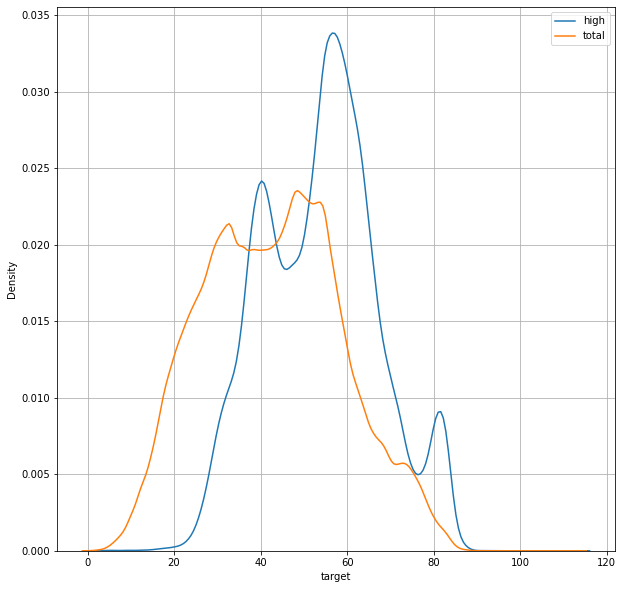

In [21]:
plt.figure(figsize=(10,10))
sns.kdeplot(ratio_high['target'],label='high')
sns.kdeplot(train['target'],label='total')
plt.grid()
plt.legend(loc='best')
plt.show()

- statnode와 endnode와 각각 해당하는 위도/경도도  같이 빼고 비율을 변수로 활용해도 될듯

In [41]:
train.loc[train['target']<=10,:]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,max_avg_ratio
38,TRAIN_0000038,20220610,금,8,2,107,삼무로,0,0,50.0,0.0,0.0,0.0,0,제주일보사거리,33.490078,126.486558,있음,삼무공원사거리,33.489940,126.490153,없음,10.0,0.200000
212,TRAIN_0000212,20211231,금,18,1,107,중정로,0,0,50.0,0.0,0.0,0.0,0,BYC,33.248491,126.566092,있음,정방수퍼,33.248633,126.567766,없음,9.0,0.180000
333,TRAIN_0000333,20220104,화,12,3,103,일반국도12호선,0,0,70.0,0.0,0.0,0.0,0,중앙교,33.254129,126.565481,없음,중앙로타리,33.253200,126.561049,없음,7.0,0.100000
538,TRAIN_0000538,20220527,금,21,2,107,새서귀로,0,0,60.0,0.0,0.0,0.0,0,삼주연립101동,33.251045,126.510574,없음,한솔고기국수,33.251947,126.510894,없음,10.0,0.166667
796,TRAIN_0000796,20210903,금,21,2,107,경찰로,0,0,60.0,0.0,0.0,0.0,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,10.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700630,TRAIN_4700630,20211220,월,14,3,103,일반국도11호선,0,0,70.0,0.0,0.0,0.0,0,중앙여고사거리,33.487633,126.540414,있음,중앙여고입구,33.489161,126.539000,있음,10.0,0.142857
4700632,TRAIN_4700632,20220526,목,9,2,107,동홍로,0,0,50.0,0.0,0.0,0.0,0,대흥개발(주),33.256517,126.568198,없음,동홍사거리,33.254628,126.567678,없음,9.0,0.180000
4700648,TRAIN_4700648,20220517,화,2,2,107,동홍로,0,0,50.0,0.0,0.0,0.0,0,성카인테리어,33.257474,126.568494,없음,대흥개발(주),33.256517,126.568198,없음,10.0,0.200000
4700829,TRAIN_4700829,20210919,일,14,3,103,일반국도16호선,0,0,70.0,0.0,0.0,0.0,0,노형파출소,33.486327,126.480150,없음,노형오거리,33.486000,126.479550,없음,9.0,0.128571


C:\Users\guswp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


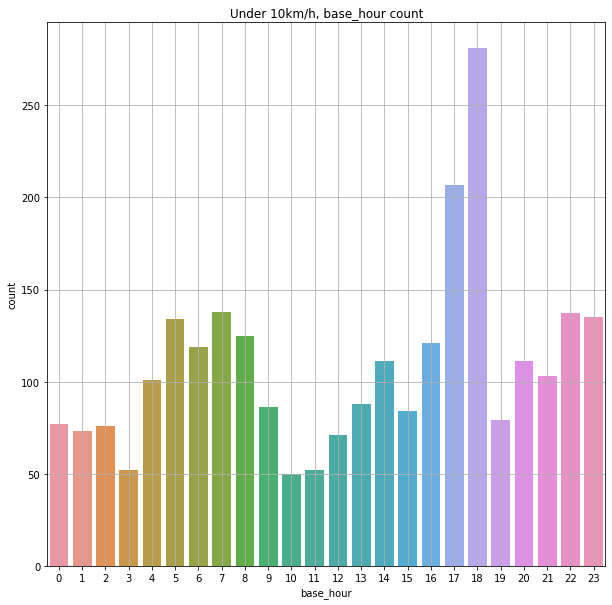

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(train.loc[train['target']<=5,'base_hour'])
plt.title('Under 10km/h, base_hour count')
plt.grid()
plt.show()

C:\Users\guswp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


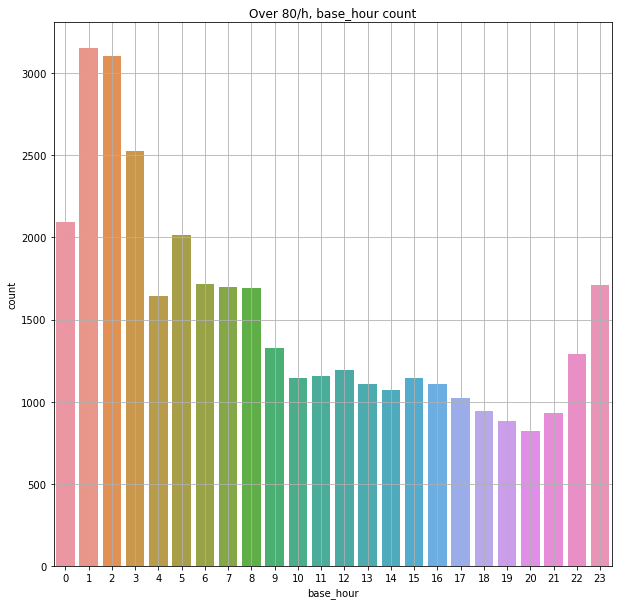

In [54]:
plt.figure(figsize=(10,10))
sns.countplot(train.loc[train['target']>=80,'base_hour'])
plt.title('Over 80/h, base_hour count')
plt.grid()
plt.show()

C:\Users\guswp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


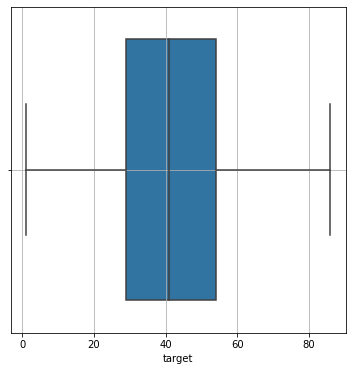

In [49]:
plt.figure(figsize=(6,6))
sns.boxplot(train.loc[train['base_hour']==8,'target'])
# plt.title('Under 10km/h, base_hour count')
plt.grid()
plt.show()

In [42]:
train.shape

(4701217, 24)

## weight_restricted (통과제한하중)

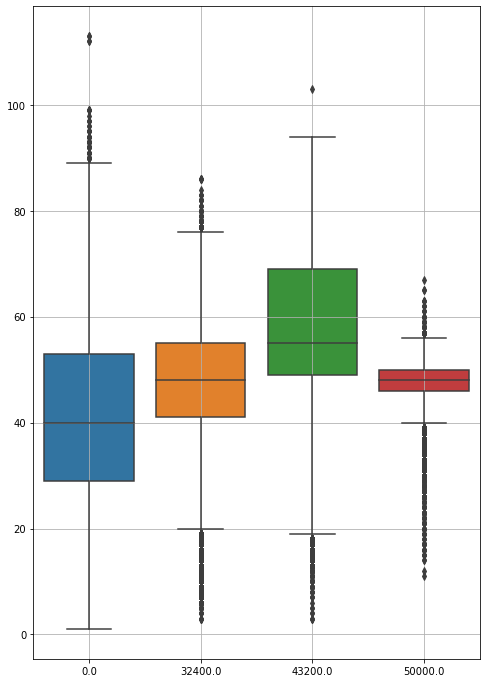

In [69]:
boxplot('weight_restricted')

## height_restricted (통과제한높이)

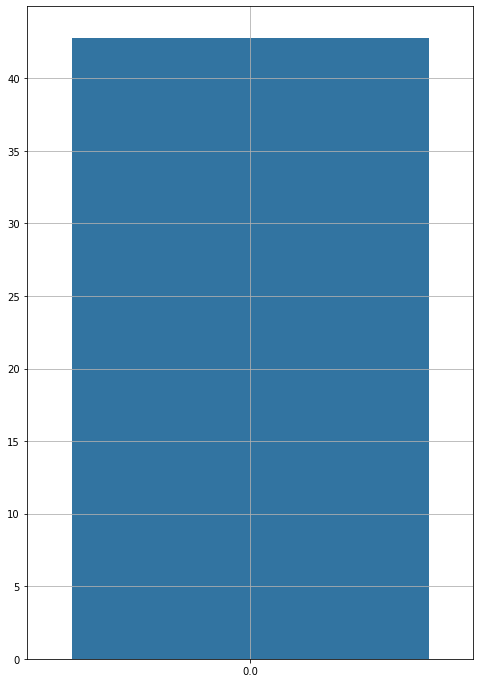

In [64]:
barplot('height_restricted')

## road_type (도로유형)

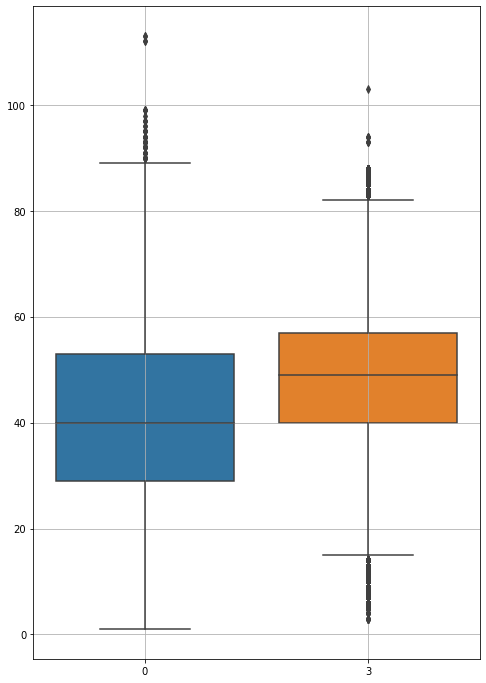

In [50]:
boxplot('road_type')

- 0: 일반도로
- 3: 교량(다리 위에 있는 도로)

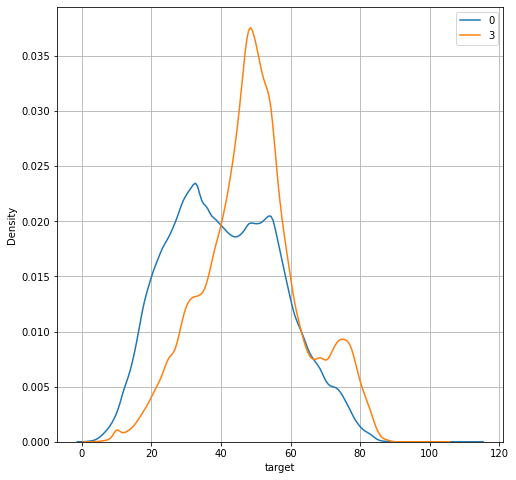

In [51]:
plt.figure(figsize=(8,8))
for i in [0,3]:
    sns.kdeplot(train.loc[train['road_type']==i,'target'],label=i)
plt.legend(loc='best')
plt.grid()
plt.show()

In [54]:
set(train.loc[(train['road_type']==3) & (train['target']>63),'road_name'].to_list())

{'-',
 '남조로',
 '번영로',
 '연북2교',
 '일반국도11호선',
 '일반국도12호선',
 '일반국도16호선',
 '일반국도95호선',
 '지방도1112호선',
 '지방도1115호선',
 '지방도1118호선',
 '지방도1119호선',
 '지방도1132호선',
 '지방도97호선'}

- 일반도로와 교량은 차이가 있어보임

## start_turn_restricted (시작 지점의 회전제한 유무)

In [ ]:
boxplot('start_turn_restricted')

## end_turn_restricted (도착지점의 회전제한 유무)

In [ ]:
boxplot('end_turn_restricted')

## road_name (도로명)

## start_node_name (시작지점명)

In [ ]:
## 같은 링크별로 데이터 2개 존재(A->B, B->A)

## end_node_name (도착지점명)

## vehicle_restricted (통과제한차량)

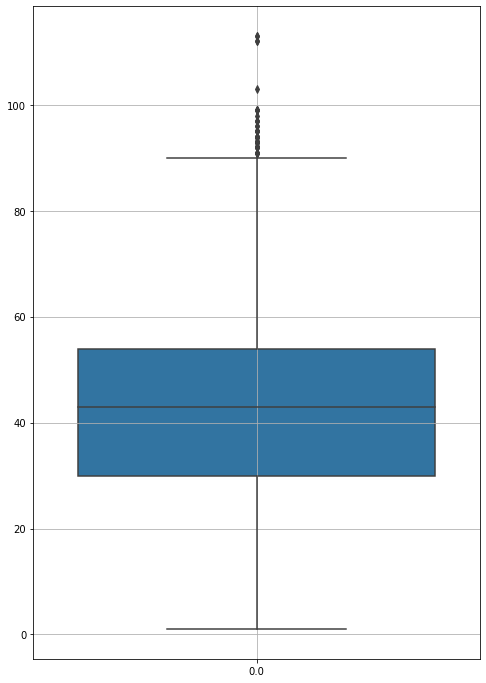

In [70]:
boxplot('vehicle_restricted')

- 같은 도로라도 구간별로 나눠져있음

In [ ]:
## 파생변수 토일 제외하고 크리스마스/ 설날 이런날 체크


# 데이터 정제

## 파생변수

## 구간별 길이

In [ ]:
pip install haversine

In [27]:
from haversine import haversine

In [28]:
lat_long = []
for s_lat,s_long,e_lat,e_long in train[['start_latitude','start_longitude','end_latitude','end_longitude']].to_numpy():
    dist = haversine((s_lat,s_long),(e_lat,e_long),unit='km')
    lat_long.append(dist)

In [29]:
train['road_dist'] = lat_long

In [30]:
lat_long = []
for s_lat,s_long,e_lat,e_long in test[['start_latitude','start_longitude','end_latitude','end_longitude']].to_numpy():
    dist = haversine((s_lat,s_long),(e_lat,e_long),unit='km')
    lat_long.append(dist)

In [31]:
test['road_dist'] = lat_long

### '구간별 제한속도 대비 평균속도 비율' 변수

In [40]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [32]:
train['max_avg_ratio'] = train['target'] / train['maximum_speed_limit']

In [33]:
# from yellowbrick.cluster import KElbowVisualizer
# from sklearn.cluster import KMeans
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,10))
# visualizer.fit(train[['road_dist','target']])

- k=3 이 적절해 보임

In [34]:
# k = 3

# # 그룹 수, random_state 설정
# k_means = KMeans(n_clusters = k, random_state = 2022)

# # 정규화된 데이터에 학습
# k_means.fit(train[['road_dist','target']])

# # 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# train['cluster'] = k_means.fit_predict(train[['road_dist','target']])

In [35]:
# import matplotlib.pyplot as plt

# plt.figure(figsize = (8, 8))

# for i in range(k):
#     plt.scatter(train.loc[train['cluster'] == i, 'road_dist'], train.loc[train['cluster'] == i, 'target'], 
#                 label = 'cluster ' + str(i))

# plt.legend()
# plt.title('K = %d results'%k , size = 15)
# plt.xlabel('road_dist', size = 12)
# plt.ylabel('target', size = 12)
# plt.show()

In [36]:
# 속도를 얼마나 낼 수 있을까에 대한거....(요일, 시간대, 도로별 특성....)
gpy_standard = ['start_latitude','start_longitude','end_latitude','end_longitude']
max_ratio_groupby = train[gpy_standard+['max_avg_ratio']].groupby(gpy_standard).mean().reset_index()
max_ratio_groupby

## start_node와 end_node로 그룹바이 했을 때 갯수랑 비교
## 구간은 동일한데 시작과 도착이 서로 반대라서 다르게 카운팅 될 수도...


,start_latitude,start_longitude,end_latitude,end_longitude,max_avg_ratio
0,33.243432,126.422025,33.244882,126.419089,1.277074
1,33.244512,126.427069,33.249505,126.430787,1.355226
2,33.244601,126.562080,33.244871,126.564407,0.513336
3,33.244601,126.562080,33.247607,126.561943,0.441340
4,33.244871,126.564407,33.244601,126.562080,0.439949
...,...,...,...,...,...
899,33.553525,126.739714,33.554302,126.738379,0.487628
900,33.554302,126.738379,33.553525,126.739714,0.681790
901,33.554302,126.738379,33.555316,126.736681,0.534187
902,33.555316,126.736681,33.554302,126.738379,0.469063


In [37]:
print(max_ratio_groupby.shape)

(904, 5)


In [38]:
gpy_se = ['start_node_name','end_node_name']
max_ratio_groupby = train[gpy_se+['max_avg_ratio']].groupby(gpy_se).mean().reset_index()
max_ratio_groupby

,start_node_name,end_node_name,max_avg_ratio
0,BYC,김약국,0.471400
1,BYC,정방수퍼,0.537955
2,CU서귀호근로점,서호교회,0.652446
3,KAL사거리,광양사거리,0.398716
4,가는질,우사,0.917172
...,...,...,...
803,회수입구,중문입구삼거리,0.824004
804,회수입구,회수사거리,0.654850
805,회천교차로,와흘교차로,0.892825
806,효례교,청송낚시,0.611753


In [39]:
s_e = []
for s,e in train[['start_node_name','end_node_name']].to_numpy():
    s_e.append(set([s,e]))

In [40]:
train['start-end'] = s_e

In [41]:
# groupby 기준으로 집합을 활용할 수 없어서 문자열로 변경
train['start-end'] = train['start-end'].apply(lambda x: list(x)[0] if len(list(x)) == 1 else list(x)[0]+'-'+list(x)[1])

In [42]:
# 도로 구간별 평균속도와 제한속도 비율
road_ratio = train[['max_avg_ratio','start-end']].groupby('start-end').mean().reset_index()

In [43]:
road_ratio

,start-end,max_avg_ratio
0,BYC-정방수퍼,0.470709
1,CU서귀호근로점-서호교회,0.647724
2,KAL사거리-광양사거리,0.419178
3,가는질-우사,0.899061
4,가동-나동,0.560905
...,...,...
483,화순삼거리-남당동,0.995755
484,회수사거리-회수입구,0.607026
485,회수입구-중문입구삼거리,0.759173
486,효례교-청송낚시,0.654460


In [44]:
road_ratio.sort_values(by='max_avg_ratio',ascending=False)

,start-end,max_avg_ratio
48,구엄교-양계장,1.672584
9,감귤선과장-어도초등교,1.508167
448,하늘궁전-창고,1.470792
378,제2서홍교,1.404715
334,월평1교앞교차로-동샘교차로,1.380397
...,...,...
143,법원사거리-세무서사거리,0.337160
36,광령1교차로-무수천사가로,0.324974
170,삼무공원사거리-제주일보사거리,0.303199
174,삼양검은모래해변입구교차로-제주시 삼양2동 1480-2,0.283749


In [45]:
road_ratio['cluster'] = 0
road_ratio.loc[road_ratio['max_avg_ratio']<0.5,'cluster'] = 0
road_ratio.loc[(0.5<=road_ratio['max_avg_ratio']) & (road_ratio['max_avg_ratio']<1),'cluster'] = 1
road_ratio.loc[road_ratio['max_avg_ratio']>=1,'cluster'] = 2

In [46]:
road_ratio

,start-end,max_avg_ratio,cluster
0,BYC-정방수퍼,0.470709,0
1,CU서귀호근로점-서호교회,0.647724,1
2,KAL사거리-광양사거리,0.419178,0
3,가는질-우사,0.899061,1
4,가동-나동,0.560905,1
...,...,...,...
483,화순삼거리-남당동,0.995755,1
484,회수사거리-회수입구,0.607026,1
485,회수입구-중문입구삼거리,0.759173,1
486,효례교-청송낚시,0.654460,1


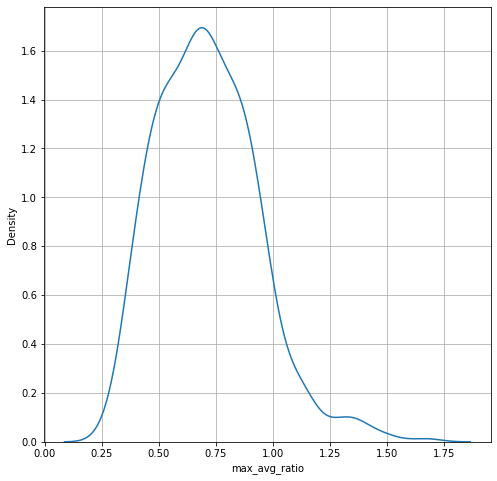

In [47]:
plt.figure(figsize=(8,8))
sns.kdeplot(road_ratio['max_avg_ratio'])
plt.grid()
plt.show()

In [48]:
## 학습 데이터와 구간별 비 데이터 조인
s_e = []
for s,e in train[['start_node_name','end_node_name']].to_numpy():
    s_e.append(set([s,e]))

In [49]:
train['start-end'] = s_e

In [50]:
# groupby 기준으로 집합을 활용할 수 없어서 문자열로 변경
train['start-end'] = train['start-end'].apply(lambda x: list(x)[0] if len(list(x)) == 1 else list(x)[0]+'-'+list(x)[1])

In [51]:
train = pd.merge(train,road_ratio[['start-end','cluster']],how='inner',left_on='start-end',right_on='start-end')

In [52]:
## 검증 데이터와 구간별 비 데이터 조인
s_e = []
for s,e in test[['start_node_name','end_node_name']].to_numpy():
    s_e.append(set([s,e]))

In [53]:
test['start-end'] = s_e

In [54]:
# groupby 기준으로 집합을 활용할 수 없어서 문자열로 변경
test['start-end'] = test['start-end'].apply(lambda x: list(x)[0] if len(list(x)) == 1 else list(x)[0]+'-'+list(x)[1])

In [55]:
test = pd.merge(test,road_ratio[['start-end','cluster']],how='inner',left_on='start-end',right_on='start-end')

In [56]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,month,road_dist,max_avg_ratio,start-end,cluster
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,6,0.025711,0.866667,제3교래교,1
1,TRAIN_0000393,2022-01-18,화,15,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,50.0,1,0.025711,0.833333,제3교래교,1
2,TRAIN_0000542,2022-06-06,월,20,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427749,126.662335,없음,제3교래교,33.427747,126.662612,없음,41.0,6,0.025711,0.683333,제3교래교,1
3,TRAIN_0001029,2022-05-04,수,9,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,55.0,5,0.025711,0.916667,제3교래교,1
4,TRAIN_0001607,2022-01-31,월,14,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,50.0,1,0.025711,0.833333,제3교래교,1


## 데이터 전처리

### 월화수목/금/주말 

In [57]:
# train 정제
train.loc[train['day_of_week'].isin(['월','화','수','목']),'day_of_week'] = '월~목'
train.loc[train['day_of_week'].isin(['토','일']),'day_of_week'] = '주말'

# test 정제

test.loc[test['day_of_week'].isin(['월','화','수','목']),'day_of_week'] = '월~목'
test.loc[test['day_of_week'].isin(['토','일']),'day_of_week'] = '주말'

In [58]:
train.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target',
       'month', 'road_dist', 'max_avg_ratio', 'start-end', 'cluster'],
      dtype='object')

### 시간대

In [59]:
dic = {0:[2,3],1:[1,4],2:[0,5],3:[6,23],4:[7,22],5:[8,20,21],6:[9,10,19],7:[11,12,13,14,15,16],8:[17,18]}

In [60]:
def hour_2_specific(h):
    for k,lv in dic.items():
        if h in lv:
            return k

In [61]:
train['hour'] = train['base_hour'].apply(hour_2_specific)
test['hour'] = test['base_hour'].apply(hour_2_specific)

## 변수 제거

In [62]:
train.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target',
       'month', 'road_dist', 'max_avg_ratio', 'start-end', 'cluster', 'hour'],
      dtype='object')

In [63]:
del_feature = ['id','height_restricted','vehicle_restricted',
               'start_node_name', 'start_latitude','start_longitude',
               'end_node_name','end_latitude', 'end_longitude',
               'multi_linked','month','base_hour','road_name']
train.drop(del_feature, axis=1, inplace=True)
test.drop(del_feature,axis=1,inplace=True)

In [66]:
train.drop(['max_avg_ratio','start-end'],axis=1,inplace=True)
test.drop(['start-end'],axis=1,inplace=True)

# 모델링

In [50]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701217 entries, 0 to 4701216
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   base_date              datetime64[ns]
 1   day_of_week            object        
 2   lane_count             int64         
 3   road_rating            int64         
 4   connect_code           int64         
 5   maximum_speed_limit    float64       
 6   weight_restricted      float64       
 7   road_type              int64         
 8   start_turn_restricted  object        
 9   end_turn_restricted    object        
 10  target                 float64       
 11  road_dist              float64       
 12  cluster                int64         
 13  hour                   int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 538.0+ MB


In [68]:
train[['target']] = train[['target']].astype('int32')

In [69]:
train[['maximum_speed_limit']] = train[['maximum_speed_limit']].astype('int16')
test[['maximum_speed_limit']] = test[['maximum_speed_limit']].astype('int16')

In [70]:
train[['weight_restricted']] = train[['weight_restricted']].astype('int32')
test[['weight_restricted']] = test[['weight_restricted']].astype('int32')

In [71]:
train.loc[train['connect_code']==103,'connect_code'] = 1
test.loc[test['connect_code']==103,'connect_code'] = 1

In [72]:
train.loc[train['road_type']==3,'road_type'] = 1
test.loc[test['road_type']==3,'road_type'] = 1

In [73]:
train.loc[train['start_turn_restricted']=='없음','start_turn_restricted'] = 0
train.loc[train['start_turn_restricted']=='있음','start_turn_restricted'] = 1
test.loc[test['start_turn_restricted']=='없음','start_turn_restricted'] = 0
test.loc[test['start_turn_restricted']=='있음','start_turn_restricted'] = 1

In [74]:
train.loc[train['end_turn_restricted']=='없음','end_turn_restricted'] = 0
train.loc[train['end_turn_restricted']=='있음','end_turn_restricted'] = 1
test.loc[test['end_turn_restricted']=='없음','end_turn_restricted'] = 0
test.loc[test['end_turn_restricted']=='있음','end_turn_restricted'] = 1

In [75]:
int_8 = ['connect_code','road_type','start_turn_restricted','end_turn_restricted','hour','lane_count','cluster']

train[int_8] = train[int_8].astype('int8')
test[int_8] = test[int_8].astype('int8')

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701217 entries, 0 to 4701216
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   base_date              datetime64[ns]
 1   day_of_week            object        
 2   lane_count             int8          
 3   road_rating            int64         
 4   connect_code           int8          
 5   maximum_speed_limit    int16         
 6   weight_restricted      int32         
 7   road_type              int8          
 8   start_turn_restricted  int8          
 9   end_turn_restricted    int8          
 10  target                 int32         
 11  road_dist              float64       
 12  cluster                int8          
 13  hour                   int8          
dtypes: datetime64[ns](1), float64(1), int16(1), int32(2), int64(1), int8(7), object(1)
memory usage: 255.6+ MB


In [78]:
# 범주형 변수
categori_columns = ['day_of_week','road_rating',
                    'weight_restricted','road_type']

train[categori_columns] = train[categori_columns].astype('category')
test[categori_columns] = test[categori_columns].astype('category')

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701217 entries, 0 to 4701216
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   base_date              datetime64[ns]
 1   day_of_week            category      
 2   lane_count             int8          
 3   road_rating            category      
 4   connect_code           int8          
 5   maximum_speed_limit    int16         
 6   weight_restricted      category      
 7   road_type              category      
 8   start_turn_restricted  int8          
 9   end_turn_restricted    int8          
 10  target                 int32         
 11  road_dist              float64       
 12  cluster                int8          
 13  hour                   int8          
dtypes: category(4), datetime64[ns](1), float64(1), int16(1), int32(1), int8(6)
memory usage: 179.3 MB


## cluster == 0

In [80]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
train1 = train.loc[train['cluster']==0,:].copy()
x_train,x_test,y_train,y_test  = train_test_split(train1.drop(['target','base_date'],axis=1),train1['target'],
                                                  test_size=0.3,stratify=train1[categori_columns])

In [82]:
model1 = CatBoostRegressor(n_estimators = 1000,learning_rate=0.1,
                          max_depth = 8,
                          loss_function='MAE',eval_metric = 'MAE')
model1.fit(x_train,y_train,
         eval_set=(x_test,y_test),
         early_stopping_rounds=30,
         cat_features = categori_columns,
          verbose=50)

0:	learn: 7.3940258	test: 7.3900744	best: 7.3900744 (0)	total: 836ms	remaining: 13m 55s
50:	learn: 5.4437814	test: 5.4350060	best: 5.4350060 (50)	total: 35.2s	remaining: 10m 55s
100:	learn: 5.2734619	test: 5.2648814	best: 5.2648814 (100)	total: 1m 6s	remaining: 9m 52s
150:	learn: 5.2051177	test: 5.1977467	best: 5.1977467 (150)	total: 1m 34s	remaining: 8m 50s
200:	learn: 5.1529278	test: 5.1466444	best: 5.1466444 (200)	total: 2m 2s	remaining: 8m 6s
250:	learn: 5.1198142	test: 5.1133348	best: 5.1133348 (250)	total: 2m 29s	remaining: 7m 25s
300:	learn: 5.0832002	test: 5.0762894	best: 5.0762894 (300)	total: 2m 56s	remaining: 6m 50s
350:	learn: 5.0438325	test: 5.0369346	best: 5.0369346 (350)	total: 3m 27s	remaining: 6m 24s
400:	learn: 5.0221356	test: 5.0158221	best: 5.0158221 (400)	total: 3m 56s	remaining: 5m 53s
450:	learn: 5.0137299	test: 5.0077950	best: 5.0077950 (450)	total: 4m 22s	remaining: 5m 19s
500:	learn: 5.0079462	test: 5.0022813	best: 5.0022813 (500)	total: 4m 48s	remaining: 4m 4

In [83]:
print('Score: ',model1.score(x_test,y_test))

Score:  0.5249246991694738


## cluster == 1

In [84]:
train2 = train.loc[train['cluster']==1,:].copy()
x_train,x_test,y_train,y_test  = train_test_split(train2.drop(['target','base_date'],axis=1),train2['target'],
                                                  test_size=0.3,stratify=train2[categori_columns])

In [85]:
model2 = CatBoostRegressor(n_estimators = 2000,learning_rate=0.05,
                          max_depth = 8,
                          loss_function='MAE',eval_metric = 'MAE')
model2.fit(x_train,y_train,
         eval_set=(x_test,y_test),
         early_stopping_rounds=30,
         cat_features = categori_columns,
          verbose=50)

0:	learn: 11.6211632	test: 11.6100094	best: 11.6100094 (0)	total: 4.89s	remaining: 2h 43m 5s
50:	learn: 6.7572706	test: 6.7579220	best: 6.7579220 (50)	total: 1m 26s	remaining: 55m 11s
100:	learn: 6.2375396	test: 6.2378713	best: 6.2378713 (100)	total: 2m 25s	remaining: 45m 32s
150:	learn: 5.9221168	test: 5.9225378	best: 5.9225378 (150)	total: 3m 24s	remaining: 41m 42s
200:	learn: 5.6789822	test: 5.6790893	best: 5.6790893 (200)	total: 4m 24s	remaining: 39m 29s
250:	learn: 5.4992835	test: 5.4992273	best: 5.4992273 (250)	total: 5m 24s	remaining: 37m 44s
300:	learn: 5.3698682	test: 5.3697831	best: 5.3697831 (300)	total: 6m 25s	remaining: 36m 17s
350:	learn: 5.2800299	test: 5.2799151	best: 5.2799151 (350)	total: 7m 28s	remaining: 35m 5s
400:	learn: 5.1883048	test: 5.1884954	best: 5.1884954 (400)	total: 8m 28s	remaining: 33m 49s
450:	learn: 5.1168773	test: 5.1174153	best: 5.1174153 (450)	total: 9m 26s	remaining: 32m 26s
500:	learn: 5.0506225	test: 5.0515180	best: 5.0515180 (500)	total: 10m 25

In [87]:
print('Score: ',model2.score(x_test,y_test))

Score:  0.8039740445216113


## cluster == 2

In [93]:
train3.shape

(351061, 14)

In [88]:
train3 = train.loc[train['cluster']==2,:].copy()
x_train,x_test,y_train,y_test  = train_test_split(train3.drop(['target','base_date'],axis=1),train3['target'],
                                                  test_size=0.3,stratify=train3[categori_columns])

In [89]:
model3 = CatBoostRegressor(n_estimators = 3000,learning_rate=0.02,
                          max_depth = 8,
                          loss_function='MAE',eval_metric = 'MAE')
model3.fit(x_train,y_train,
         eval_set=(x_test,y_test),
         early_stopping_rounds=30,
         cat_features = categori_columns,
          verbose=50)

0:	learn: 9.8445941	test: 9.8406317	best: 9.8406317 (0)	total: 212ms	remaining: 10m 36s
50:	learn: 5.3614226	test: 5.3530926	best: 5.3530926 (50)	total: 7.12s	remaining: 6m 51s
100:	learn: 4.2206370	test: 4.2109579	best: 4.2109579 (100)	total: 14s	remaining: 6m 43s
150:	learn: 3.9254743	test: 3.9169154	best: 3.9169154 (150)	total: 21.6s	remaining: 6m 46s
200:	learn: 3.8367458	test: 3.8290767	best: 3.8290767 (200)	total: 29.5s	remaining: 6m 50s
250:	learn: 3.8054061	test: 3.7979025	best: 3.7979025 (250)	total: 37s	remaining: 6m 45s
300:	learn: 3.7897411	test: 3.7828221	best: 3.7828221 (300)	total: 44.5s	remaining: 6m 39s
350:	learn: 3.7785479	test: 3.7721887	best: 3.7721887 (350)	total: 51.9s	remaining: 6m 31s
400:	learn: 3.7707430	test: 3.7651500	best: 3.7651500 (400)	total: 58.8s	remaining: 6m 21s
450:	learn: 3.7655813	test: 3.7604212	best: 3.7604212 (450)	total: 1m 5s	remaining: 6m 8s
500:	learn: 3.7609845	test: 3.7562583	best: 3.7562583 (500)	total: 1m 11s	remaining: 5m 58s
550:	lea

In [90]:
print('Score: ',model3.score(x_test,y_test))

Score:  0.8166257930263162


In [98]:
test.loc[test['cluster']==0,:].drop(['target','base_date'],axis=1)

,day_of_week,lane_count,road_rating,connect_code,maximum_speed_limit,weight_restricted,road_type,start_turn_restricted,end_turn_restricted,road_dist,cluster,hour
0,월~목,3,107,0,70,0,0,0,1,0.278927,0,8
1,월~목,3,107,0,70,0,0,1,0,0.278927,0,2
2,월~목,3,107,0,70,0,0,0,1,0.278927,0,7
3,금,3,107,0,70,0,0,0,1,0.278927,0,3
4,월~목,3,107,0,70,0,0,1,0,0.278927,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
290282,월~목,2,107,0,60,0,0,0,0,0.146448,0,7
290283,월~목,2,107,0,60,0,0,0,0,0.146448,0,7
290284,금,2,107,0,60,0,0,0,0,0.146448,0,5
290285,월~목,2,107,0,60,0,0,0,0,0.146448,0,3


In [99]:
test['target'] = 0
model1.predict(test.loc[test['cluster']==0,:].drop(['target','base_date'],axis=1))

array([23.94505675, 45.25289529, 27.08210549, ..., 27.43796468,
       29.91733955, 27.65000332])

In [ ]:
test['target'] = 0
test.loc[test['cluster']==0,'target'] = model1.predict(test.loc[test['cluster']==0,:].drop(['target'],axis=1))

- 최고속도 / 제한속도 이거 잡으면 안될듯..
- 도로 구간별로 먼가 군집화 시키긴 해야할 듯
- 크게 도로 특성, 날씨 특성...

# 최종 제출

In [73]:
sample = pd.read_csv(data_dir_+'sample_submission.csv')

In [75]:
pred = model.predict(test.drop(['base_date']+categori_columns,axis=1))

In [76]:
sample['target'] = pred

In [77]:
sample.to_csv(data_dir_ +'sample.csv',index=False)